<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Classification Model Comparison Lab
## Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> Check out the codebook in the repo for some inspiration.

> You'll be asked to answer one of these questions later on, so make sure your questions are based on the data provided (specifically Q1 - Q44)!

Answer: Does a personality trait have an effect on wether a person is left handed?

Is left-handedness rate affected by someones personality of being more outgoing or more introverted?

Can left-handedness rate be affected by race or religion?

---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

> Notice that the data is separated by *tabs* (not commas, like most .csv files). Check out the parameters to see if there is anything that might help you parse this.

In [141]:
df = pd.read_csv('./data.csv', delimiter='	')

In [142]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,3,5,4,5,2,4,2,2,2,5,...,US,1,1,18,2,1,1,6,2,1
4180,1,5,1,5,1,4,2,4,1,4,...,US,1,1,18,2,2,1,3,2,1
4181,3,2,2,4,5,4,5,2,2,5,...,PL,2,2,22,2,1,1,6,1,1
4182,1,3,4,5,1,3,3,1,1,3,...,US,2,1,16,1,2,5,1,1,1


### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

Answer: Would keep the survey with no name so it stays annonymous. Do not gather any infromation that can be tracked back to the person who is taking the survey.

---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [143]:
df.isnull().sum()

Q1             0
Q2             0
Q3             0
Q4             0
Q5             0
Q6             0
Q7             0
Q8             0
Q9             0
Q10            0
Q11            0
Q12            0
Q13            0
Q14            0
Q15            0
Q16            0
Q17            0
Q18            0
Q19            0
Q20            0
Q21            0
Q22            0
Q23            0
Q24            0
Q25            0
Q26            0
Q27            0
Q28            0
Q29            0
Q30            0
Q31            0
Q32            0
Q33            0
Q34            0
Q35            0
Q36            0
Q37            0
Q38            0
Q39            0
Q40            0
Q41            0
Q42            0
Q43            0
Q44            0
introelapse    0
testelapse     0
country        0
fromgoogle     0
engnat         0
age            0
education      0
gender         0
orientation    0
race           0
religion       0
hand           0
dtype: int64

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q1           4184 non-null   int64 
 1   Q2           4184 non-null   int64 
 2   Q3           4184 non-null   int64 
 3   Q4           4184 non-null   int64 
 4   Q5           4184 non-null   int64 
 5   Q6           4184 non-null   int64 
 6   Q7           4184 non-null   int64 
 7   Q8           4184 non-null   int64 
 8   Q9           4184 non-null   int64 
 9   Q10          4184 non-null   int64 
 10  Q11          4184 non-null   int64 
 11  Q12          4184 non-null   int64 
 12  Q13          4184 non-null   int64 
 13  Q14          4184 non-null   int64 
 14  Q15          4184 non-null   int64 
 15  Q16          4184 non-null   int64 
 16  Q17          4184 non-null   int64 
 17  Q18          4184 non-null   int64 
 18  Q19          4184 non-null   int64 
 19  Q20          4184 non-null 

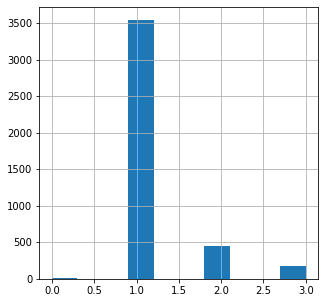

In [145]:
df['hand'].hist(figsize=(5,5));

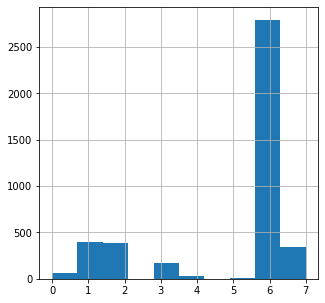

In [146]:
df['race'].hist(figsize=(5,5));

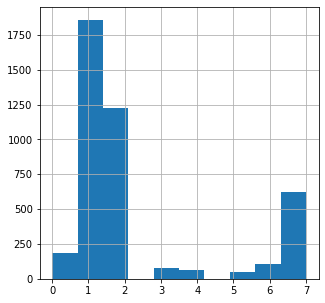

In [147]:
df['religion'].hist(figsize=(5,5));

---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

Answer:

This would be a classification problem because we are trying to predict a descrete label that falls into two categories. Classifications help us determing a yes or no answer.

### 6. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

Answer: 

We standardize variables to make sure we are scoring them on the same scale.

### 7. Give an example of when we might not standardize our variables.

Answer:

One example would be that if the data we are standardizing is using very specific units that are required to interpret the data, also we do not need to standardize for classification problems.

### 8. Based on your answers to 6 and 7, do you think we should standardize our predictor variables in this case (remember we're only using Q1 - Q44 as predictor variables)? Why or why not?

Answer:

No because the data we are using is already using is not using specific units and we do not need to standardize classification problems.

### 9. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

> Note: Think critically about how to clean the $y$ variable based on your problem statement.
   
   > Be sure to provide some explanation/justification for your choice.

Answer: 

First thing we have to check for is null numbers but we had none. Next I need to determing how many variables I want to work with on 'hand'. The options were righ, left, and both. Since we are trying to determine left handed and right or both do not really matter I decided to change the both column to right that way I only have 2 variables to work with.

In [148]:
df['hand'].isnull().sum()

0

In [149]:
df['hand'] = df['hand'].map({0:1, 1:1, 2:2, 3:1})

In [150]:
df['hand']

0       1
1       1
2       2
3       2
4       1
       ..
4179    1
4180    1
4181    1
4182    1
4183    1
Name: hand, Length: 4184, dtype: int64

### 10. The professor for whom you work suggests that you set $k = 4$. In this specific case, why might this be a bad idea?

Answer: 

### 11. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$.

> Instantiate and fit your models.

In [151]:
X = df.drop(columns=['introelapse',
                    'testelapse',
                    'country',
                     'fromgoogle',
                     'engnat',
                     'age',
                     'education',
                     'gender',
                     'orientation',
                     'race',
                     'religion',
                     'hand'
                    ])
y = df['hand']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=23,
    stratify=y
)

In [152]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [153]:
# KNN_3 Score
knn_3.score(X_train, y_train)

0.9088114754098361

In [154]:
knn_3.score(X_test, y_test)

0.8662420382165605

In [155]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)

KNeighborsClassifier()

In [156]:
#KNN_5 score
knn_5.score(X_train, y_train)

0.894808743169399

In [157]:
knn_5.score(X_test, y_test)

0.8781847133757962

In [158]:
knn_15 = KNeighborsClassifier(n_neighbors=15)
knn_15.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [159]:
# KNN_15 score
knn_15.score(X_train, y_train)

0.8920765027322405

In [160]:
knn_15.score(X_test, y_test)

0.89171974522293

In [161]:
knn_25 = KNeighborsClassifier(n_neighbors=25)
knn_25.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [162]:
# KNN_25 score
knn_25.score(X_train, y_train)

0.8920765027322405

In [163]:
knn_25.score(X_test, y_test)

0.89171974522293

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 12. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

Answer: 

L2 is the default.

### 13. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize our features?

Answer: 

Since our values are already using the same units on the same scale we do not need to strandardize our features.

### 14. Let's use logistic regression to predict whether or not the person is left-handed.


> Be sure to use the same train/test split with your data as with your $k$-NN model above!

> Create four separate logistic regression models, one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

> Instantiate and fit your models.

In [189]:
lgreg_ridge1 = LogisticRegression(penalty='l2', C=1, solver='lbfgs')
lgreg_ridge1.fit(X_train, y_train)

/Users/josedelgadillo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [182]:
lgreg_ridge10 = LogisticRegression(penalty='l2', C=10, solver='lbfgs')
lgreg_ridge10.fit(X_train, y_train)

LogisticRegression(C=10)

In [183]:
lgreg_lasso1 = LogisticRegression(penalty='l1', C=1, solver='liblinear')
lgreg_lasso1.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [184]:
lgreg_lasso10 = LogisticRegression(penalty='l1', C=10, solver='liblinear')
lgreg_lasso1.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

---
## Step 5: Evaluate the model(s).

### 15. Before calculating any score on your data, take a step back. Think about your $X$ variable and your $Y$ variable. Do you think your $X$ variables will do a good job of predicting your $Y$ variable? Why or why not? What impact do you think this will have on your scores?

> For this question, consider your own thoughts (or research) on the relationship between psychological factors and handedness.

> When evaluating your models later on, consider whether a high score always means the variables are good predictors. Is this always the case?

Answer:

No it did not seem like there was a strong case to determine if X was a good variable to predict y. It does not seem there is a strong correlation. I do not belive the question was a good one to answer from the beginning because personality traits most likely do not impact left handedness.

### 16. Using accuracy as your metric, evaluate all eight of your models on both the training and testing sets. Put your scores below. (If you want to be fancy and generate a table in Markdown, there's a [Markdown table generator site linked here](https://www.tablesgenerator.com/markdown_tables#).)
- Note: Your answers here might look a little weird. You didn't do anything wrong; that's to be expected!

In [185]:
print('KNN = 3 train score:', knn_3.score(X_train, y_train))
print('KNN = 5 train score:', knn_5.score(X_train, y_train))
print('KNN = 15 train score:', knn_15.score(X_train, y_train))
print('KNN = 25 train score:', knn_25.score(X_train, y_train))

KNN = 3 train score: 0.9088114754098361
KNN = 5 train score: 0.894808743169399
KNN = 15 train score: 0.8920765027322405
KNN = 25 train score: 0.8920765027322405


In [186]:
print('KNN = 3 test score:', knn_3.score(X_test, y_test))
print('KNN = 5 test score:', knn_5.score(X_test, y_test))
print('KNN = 15 test score:', knn_15.score(X_test, y_test))
print('KNN = 25 test score:', knn_25.score(X_test, y_test))

KNN = 3 test score: 0.8662420382165605
KNN = 5 test score: 0.8781847133757962
KNN = 15 test score: 0.89171974522293
KNN = 25 test score: 0.89171974522293


In [190]:
print('Logistic Regression Lasso = 1 train score:', lgreg_lasso1.score(X_train, y_train))
print('Logistic Regression Lasso = 10 train score:', lgreg_lasso10.score(X_train, y_train))
print('Logistic Regression Ridge = 1 train score:', lgreg_ridge1.score(X_train, y_train))
print('Logistic Regression Ridge = 10 train score:', lgreg_ridge10.score(X_train, y_train))

Logistic Regression Lasso = 1 train score: 0.8924180327868853
Logistic Regression Lasso = 10 train score: 0.8920765027322405
Logistic Regression Ridge = 1 train score: 0.8920765027322405
Logistic Regression Ridge = 10 train score: 0.8920765027322405


In [191]:
print('Logistic Regression Lasso = 1 test score:', lgreg_lasso1.score(X_test, y_test))
print('Logistic Regression Lasso = 10 test score:', lgreg_lasso10.score(X_test, y_test))
print('Logistic Regression Ridge = 1 test score:', lgreg_ridge1.score(X_test, y_test))
print('Logistic Regression Ridge = 10 test score:', lgreg_ridge10.score(X_test, y_test))

Logistic Regression Lasso = 1 test score: 0.89171974522293
Logistic Regression Lasso = 10 test score: 0.89171974522293
Logistic Regression Ridge = 1 test score: 0.89171974522293
Logistic Regression Ridge = 10 test score: 0.89171974522293


### 17. In which of your $k$-NN models is there evidence of overfitting? How do you know?

Answer: 

The model that shows overfitting is when k=3. We can tell by the difference in the scores, it has the largest difference in score.

### 18. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

Answer: 

As K increases bias and varianced a reduced.

### 19. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer:

We could increase k, simplify our data, and regularizing.

### 20. In which of your logistic regression models is there evidence of overfitting? How do you know?

Answer:

None of my logistic regression models showed any evidence of ovefitting, we know this because my scores were at a constant score of 0.89

### 21. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

Answer: 

As C increases variance should increase and bias should decrease.

### 22. For your logistic regression models, play around with the regularization hyperparameter, $C$. As you vary $C$, what happens to the fit and coefficients in the model? What do you think this means in the context of this specific problem?

Answer:

### 23. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer:

We could increase k, simplify our data, and regularizing.

---
## Step 6: Answer the problem.

### 24. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

Answer:

KNN, it was modeling the data a little better than logistic regression.

### 25. Select your logistic regression model that utilized LASSO regularization with $\alpha = 1$. Interpret the coefficient for `Q1`.

In [199]:
lgreg_lasso1.coef_[]

-0.015524607668511969

### 26. If you have to select one model overall to be your *best* model, which model would you select? Why?
- Usually in the "real world," you'll fit many types of models but ultimately need to pick only one! (For example, a client may not understand what it means to have multiple models, or if you're using an algorithm to make a decision, it's probably pretty challenging to use two or more algorithms simultaneously.) It's not always an easy choice, but you'll have to make it soon enough. Pick a model and defend why you picked this model!

Answer:

I dont think any of the models on the Logistic Regression would work so i would pick the KNN models.

### 27. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer one of these for the professor based on the model you selected!

Answer:

Does a personality trait have an effect on wether a person is left handed?


There was no clear evidence with the data we had to imply that there is any evidence with personality and left handedness.

### BONUS:
Looking for more to do? Probably not - you're busy! But if you want to, consider exploring the following. (They could make for a blog post!)
- Create a visual plot comparing training and test metrics for various values of $k$ and various regularization schemes in logistic regression.
- Rather than just evaluating models based on accuracy, consider using sensitivity, specificity, etc.
- In the context of predicting left-handedness, why are unbalanced classes concerning? If you were to re-do this process given those concerns, what changes might you make?